In [1]:
import qcodes as qc
from qdev_wrappers.file_setup import my_init
qc.config.add("mainfolder", "./mainfolder", value_type="string", description="Location of data", default="./mainfolder")
station = qc.Station()
my_init('data', station)

User schema at /Users/Lillian/qcodesrc_schema.json not found.User settings won't be validated
no config file found at /Users/Lillian/Qcodes/My stuff/mainfolder/data/local_scripts/instr.config, will try general
no config file found at /Users/Lillian/Qcodes/My stuff/instr.config


In [2]:
from qdev_wrappers.fitting.Converter import SQL_Converter, Legacy_Converter, data_to_dict
from qdev_wrappers.fitting.Fitclasses import T1, T2
from qdev_wrappers.fitting.Fitter import Fitter1D, Fitter_2Ddata_1Dfunction, fit_data
from qdev_wrappers.fitting.AnalysisToSQL import is_table, make_table, fit_to_sql
from qdev_wrappers.fitting.RoughPlotting import plot_fit1d, plot_fit2d_slice

from qdev_wrappers.show_num import show_num
from qcodes.dataset.plotting import plot_by_id

### Fitting, step 1: convert your dataset into a dictionary

Convert dataset with run id 4 from SQL, store in 'data'. This, incidentally, is a 1D dataset.

In [11]:
data = data_to_dict(4)

This can also be done with the 'old' datasets. In this case, this is a 2D dataset, containing multiple measurements at each point (mag0, phase0 and raw output):

In [13]:
data2 = data_to_dict(621, datatype = 'qcodes_legacy', samplefolder = None)

### Fitting step 2: Performing fit, getting fit dictionary

To get a fit, the data dictionary goes into the fitter along with a fitclass (options are currently T1() and T2()). 

Set *x = 'data_name_for_x'*, *y = 'data_name_for_y"* (and optionally *z = "data_name_for_z"*). If you are uncertain of the names of the variables in the data, they can be read in the data dictionary, or you can enter something random for x and y and it will throw an error that gives you a list of your options.


In [5]:
fit = fit_data(data, T1(), {'x':'pulse_readout_delay'}, {'y':'data'})

For the 2D datasets, at the moment, have only one option, which is to get back fits for slices of the data. Each slice is taken at a particular setpoint, and the fit for that setpoint is listed in the fit dictionary.

As with the 1D example, you currently specify the axes yourself. You should also choose along which direction you want the cuts to be taken.


In [14]:
fit2 = fit_data(data2, T2(), {'x':'pi_pulse_dur_set'}, {'y':'rec_ctrl_demod_freq_0_mag'}, ['qubit_rs_frequency_set'])

### Saving your fit to an SQL database (in progress)

If you want to save the analysis information, you can use this (in-progress) function, which will create (if such a thing does not already exist) a new SQL database called *analysis.db* in the same folder as your experiments. 

It will then save an SQL table with the parameters and an estimate based on the fit, as well as an id that matches the id for the corresponding data point in the experiments database.


In [9]:
fit_to_sql(fit)
fit_to_sql(fit2)

Table analysis_4_T1fit_4 created
Table analysis_621_T2fit_4 created


### Plotting your fit to make sure nothing weird has happened

To see how your fit looks compared to the data, there is currently only rough plotting from the dictionary. Pretty plotting from the saved dataset and analysis is for the near future.

The first dataset was 1D, so:

KeyError: 'xdata'

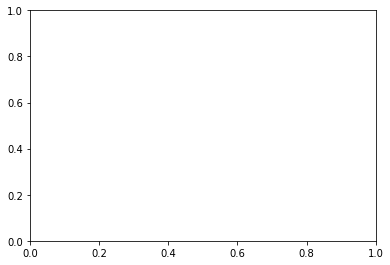

In [10]:
plot_fit1d(data, fit, T1())

#for comparison to original data:
plot_by_id(4)

For the 2D dataset, this rough plotting can only plot a cut, so it is necessary to tell it which setpoint you want to see the fit from. If you aren't sure of the setpoints, you can either find them in the fit dictionary (long and annoying to read), or just suggest something, and if that isn't on the list of setpoints, then you will get a list of options to chose from.

In [ ]:
plot_fit2d_slice(data2, fit2, T2(), setvalue = 5.65600000e+09)

In [ ]:
#for comparison to original data:
show_num(621)